# Drive & Game Data Merged Deep Dive 

The purpose of this analysis is to merge game data and drive data. This analysis will look to answer the question about what factors influence whether or not a team wins a game.

## Importing and Describing Data

In [51]:
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('/Users/wesjurden/Documents/GitHub/Personal/college-football-project/data/clean')

game = pd.read_csv('game_data_2022_clean.csv')
drive = pd.read_csv('drive_data_2022_clean.csv')

In [52]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668 entries, 0 to 3667
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attendance          0 non-null      float64
 1   away_conference     3615 non-null   object 
 2   away_division       3615 non-null   object 
 3   away_id             3668 non-null   int64  
 4   away_line_scores    3655 non-null   object 
 5   away_points         3367 non-null   float64
 6   away_post_win_prob  1409 non-null   float64
 7   away_postgame_elo   735 non-null    float64
 8   away_pregame_elo    738 non-null    float64
 9   away_team           3668 non-null   object 
 10  completed           3668 non-null   bool   
 11  conference_game     3668 non-null   bool   
 12  excitement_index    1413 non-null   float64
 13  highlights          0 non-null      float64
 14  home_conference     3659 non-null   object 
 15  home_division       3659 non-null   object 
 16  home_i

In [30]:
game.iloc[1]

attendance                                 NaN
away_conference                        Big Ten
away_division                              FBS
away_id                                    158
away_line_scores                 [7, 7, 14, 0]
away_points                               28.0
away_post_win_prob                    0.452457
away_postgame_elo                       1616.0
away_pregame_elo                        1636.0
away_team                             Nebraska
completed                                 True
conference_game                           True
excitement_index                      8.349356
highlights                                 NaN
home_conference                        Big Ten
home_division                              FBS
home_id                                     77
home_line_scores                 [3, 14, 7, 7]
home_points                               31.0
home_post_win_prob                    0.547543
home_postgame_elo                       1381.0
home_pregame_

In [53]:
drive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33635 entries, 0 to 33634
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   offense              33635 non-null  object 
 1   offense_conference   33394 non-null  object 
 2   defense              33635 non-null  object 
 3   defense_conference   33411 non-null  object 
 4   game_id              33635 non-null  int64  
 5   id                   33635 non-null  int64  
 6   drive_number         33635 non-null  int64  
 7   scoring              33635 non-null  bool   
 8   start_period         33635 non-null  int64  
 9   start_yardline       33635 non-null  int64  
 10  start_yards_to_goal  33635 non-null  int64  
 11  start_time           33635 non-null  object 
 12  end_period           33635 non-null  int64  
 13  end_yardline         33635 non-null  int64  
 14  end_yards_to_goal    33635 non-null  int64  
 15  end_time             33635 non-null 

In [29]:
drive.iloc[1]

offense                                    Vanderbilt
offense_conference                                SEC
defense                                       Hawai'i
defense_conference                      Mountain West
game_id                                     401403853
id                                         4014038532
drive_number                                        2
scoring                                         False
start_period                                        1
start_yardline                                     84
start_yards_to_goal                                84
start_time             {'minutes': 12, 'seconds': 14}
end_period                                          1
end_yardline                                       65
end_yards_to_goal                                  65
end_time                {'minutes': 9, 'seconds': 53}
elapsed                 {'minutes': 2, 'seconds': 21}
plays                                               5
yards                       

## Merging Data

The purpose of merging the data is to make the analysis more robust. There are columns in the drive data (ie. time of possession) that are only useful when paired with columns in the game data (ie. score). By merging these datasets, we will create a better overall analysis.

### Creating New Columns

The first thing we will want to do before merging the data will be to create new columns of any calculated fields for the data. This will allow any additional analysis to take place.

In [60]:
# Need to create a columns for the winning team 
game.loc[game['home_points'] > game['away_points'], 'winning_team'] = game['home_team']
game.loc[game['away_points'] > game['home_points'], 'winning_team'] = game['away_team']
game.loc[game['away_points'] == game['home_points'], 'winning_team'] = 'No Winner'
game['winning_team']

0                  Western Kentucky
1                      Northwestern
2       Florida Memorial University
3                Jacksonville State
4                              UNLV
                   ...             
3663             South Dakota State
3664                            NaN
3665                           Army
3666                            NaN
3667                            NaN
Name: winning_team, Length: 3668, dtype: object

In [65]:
# Checking why there are null winners values
nullgames = game[game['winning_team'].isnull()]

In [77]:
# Checking to see which teams, divisons, etc. this is a problem for. More investigation needed.
nullgames[['home_team', 'away_team', 'away_division', 'start_date','home_points', 'away_points', 'winning_team']]

,home_team,away_team,away_division,start_date,home_points,away_points,winning_team
2435,New Mexico State,San José State,FBS,2022-10-22T22:00:00.000Z,NaN,NaN,NaN
2445,Eureka College,Wisconsin Lutheran,III,2022-10-22T23:00:00.000Z,NaN,NaN,NaN
2776,Rochester,Hartwick,III,2022-11-05T16:00:00.000Z,NaN,NaN,NaN
2782,Husson,Nichols,III,2022-11-05T16:00:00.000Z,NaN,NaN,NaN
2784,Norwich,Catholic University,III,2022-11-05T16:00:00.000Z,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3638,North Central,Ithaca,III,2022-12-03T18:00:00.000Z,NaN,NaN,NaN
3662,Mount Union,Wartburg,III,2022-12-10T17:00:00.000Z,NaN,NaN,NaN
3664,Ferris State,West Florida,II,2022-12-10T17:00:00.000Z,NaN,NaN,NaN
3666,Colorado Mines,Shepherd,II,2022-12-10T20:30:00.000Z,NaN,NaN,NaN


### Merging the Data

In [54]:
df = pd.merge(drive, game, left_on= 'game_id', right_on = 'id', how= 'inner', suffixes=('_drive', '_game'))

In [55]:
df.head()

,offense,offense_conference,defense,defense_conference,game_id,id_drive,drive_number,scoring,start_period,start_yardline,...,id_game,neutral_site,notes,season,season_type,start_date,start_time_tbd,venue,venue_id,week
0,Hawai'i,Mountain West,Vanderbilt,SEC,401403853,4014038531,1,True,1,25,...,401403853,False,NaN,2022,regular,2022-08-28T02:30:00.000Z,False,Clarence T.C. Ching Athletics Complex,7220.0,1
1,Vanderbilt,SEC,Hawai'i,Mountain West,401403853,4014038532,2,False,1,84,...,401403853,False,NaN,2022,regular,2022-08-28T02:30:00.000Z,False,Clarence T.C. Ching Athletics Complex,7220.0,1
2,Hawai'i,Mountain West,Vanderbilt,SEC,401403853,4014038533,3,False,1,20,...,401403853,False,NaN,2022,regular,2022-08-28T02:30:00.000Z,False,Clarence T.C. Ching Athletics Complex,7220.0,1
3,Vanderbilt,SEC,Hawai'i,Mountain West,401403853,4014038534,4,False,1,61,...,401403853,False,NaN,2022,regular,2022-08-28T02:30:00.000Z,False,Clarence T.C. Ching Athletics Complex,7220.0,1
4,Hawai'i,Mountain West,Vanderbilt,SEC,401403853,4014038535,5,False,1,41,...,401403853,False,NaN,2022,regular,2022-08-28T02:30:00.000Z,False,Clarence T.C. Ching Athletics Complex,7220.0,1


In [56]:
# Calculating basic summary stats
df.describe()

,game_id,id_drive,drive_number,start_period,start_yardline,start_yards_to_goal,end_period,end_yardline,end_yards_to_goal,plays,...,highlights,home_id,home_points,home_post_win_prob,home_postgame_elo,home_pregame_elo,id_game,season,venue_id,week
count,3.363500e+04,3.363500e+04,33635.000000,33635.000000,33635.000000,33635.000000,33635.000000,33635.000000,33635.000000,33635.000000,...,0.0,33635.000000,33635.000000,33508.000000,19967.000000,19967.000000,3.363500e+04,33635.0,33635.000000,33635.000000
mean,4.014179e+08,2.702479e+10,13.013171,2.477955,50.308607,69.040523,2.662435,52.309023,38.528319,5.676676,...,NaN,1491.582429,30.913572,0.607748,1524.097611,1518.861522,4.014179e+08,2022.0,3814.824082,6.890709
std,1.464026e+04,1.737353e+10,7.519369,1.112087,26.261830,18.089408,1.148737,33.288712,31.334753,3.313193,...,NaN,5822.329872,14.990373,0.406610,239.955205,232.953361,1.464026e+04,0.0,996.531352,3.872347
min,4.014039e+08,4.014039e+09,1.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,-12.000000,0.000000,...,NaN,2.000000,0.000000,0.000312,859.000000,833.000000,4.014039e+08,2022.0,36.000000,1.000000
25%,4.014051e+08,4.014230e+09,7.000000,1.000000,25.000000,64.000000,2.000000,25.000000,3.000000,3.000000,...,NaN,153.000000,20.000000,0.158601,1357.000000,1361.000000,4.014051e+08,2022.0,3674.000000,3.000000
50%,4.014166e+08,4.014051e+10,13.000000,2.000000,51.000000,75.000000,3.000000,54.000000,41.000000,5.000000,...,NaN,324.000000,30.000000,0.808913,1539.000000,1534.000000,4.014166e+08,2022.0,3801.000000,7.000000
75%,4.014244e+08,4.014208e+10,19.000000,3.000000,75.000000,79.000000,4.000000,80.000000,67.000000,8.000000,...,NaN,2415.000000,41.000000,0.994936,1672.000000,1662.000000,4.014244e+08,2022.0,3923.000000,10.000000
max,4.015077e+08,4.015077e+10,43.000000,6.000000,100.000000,100.000000,6.000000,175.000000,175.000000,33.000000,...,NaN,112358.000000,98.000000,0.998972,2233.000000,2190.000000,4.015077e+08,2022.0,7311.000000,15.000000


In [59]:
# Only has regular sesason games. Need to get post sesaon as well. 
df['season_type'].unique()

array(['regular'], dtype=object)

## Scoring Analysis

When analyzing the results of a game, one might be curious about attributes related to scoring. How long does it take on average for a team to score, how often do teams score, and how does this impact their chances of successfully beating their opponenet?

In [57]:
# How many drives resulted in a score? - 12,159
df['scoring'].value_counts()

False    21476
True     12159
Name: scoring, dtype: int64

In [18]:
# Subsetting data to just have scoring drives
scoring = df[df['scoring'] == True]

In [19]:
# Viewing newly created data set
scoring.head()

,offense,offense_conference,defense,defense_conference,game_id,id_drive,drive_number,scoring,start_period,start_yardline,...,id_game,neutral_site,notes,season,season_type,start_date,start_time_tbd,venue,venue_id,week
0,Hawai'i,Mountain West,Vanderbilt,SEC,401403853,4014038531,1,True,1,25,...,401403853,False,NaN,2022,regular,2022-08-28T02:30:00.000Z,False,Clarence T.C. Ching Athletics Complex,7220.0,1
5,Vanderbilt,SEC,Hawai'i,Mountain West,401403853,4014038536,6,True,1,90,...,401403853,False,NaN,2022,regular,2022-08-28T02:30:00.000Z,False,Clarence T.C. Ching Athletics Complex,7220.0,1
6,Hawai'i,Mountain West,Vanderbilt,SEC,401403853,4014038537,7,True,1,30,...,401403853,False,NaN,2022,regular,2022-08-28T02:30:00.000Z,False,Clarence T.C. Ching Athletics Complex,7220.0,1
7,Hawai'i,Mountain West,Vanderbilt,SEC,401403853,4014038538,8,True,1,25,...,401403853,False,NaN,2022,regular,2022-08-28T02:30:00.000Z,False,Clarence T.C. Ching Athletics Complex,7220.0,1
8,Vanderbilt,SEC,Hawai'i,Mountain West,401403853,4014038539,9,True,2,65,...,401403853,False,NaN,2022,regular,2022-08-28T02:30:00.000Z,False,Clarence T.C. Ching Athletics Complex,7220.0,1


In [23]:
# What is the average number of drives it takes to score?
scoring['drive_number'].mean()

12.36853359651287

In [25]:
# Looking at distribution of drive number
scoring['drive_number'].describe()

count    12159.000000
mean        12.368534
std          7.194840
min          1.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         39.000000
Name: drive_number, dtype: float64

<AxesSubplot:>

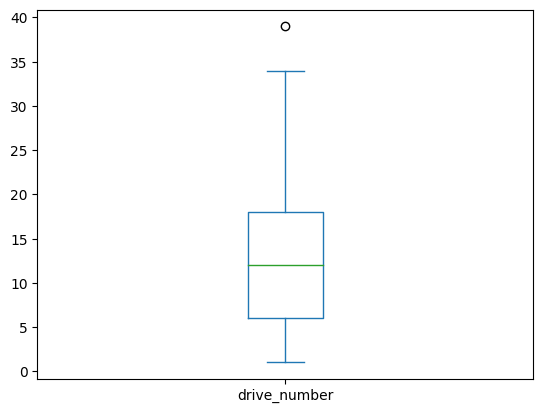

In [26]:
# Plotting drive number
scoring['drive_number'].plot(kind='box')

Most teams score their first drive somewhere between the 6th and 18th drive of the game.

In [45]:
# Summary stats for yards, plays, and elapsed_sec
scoring[['yards', 'plays', 'elapsed_sec']].describe()

,yards,plays,elapsed_sec
count,12159.000000,12159.000000,12159.000000
mean,57.959372,7.247224,179.966938
std,23.916023,3.607682,118.326599
min,-35.000000,0.000000,0.000000
25%,45.000000,4.000000,92.000000
50%,65.000000,7.000000,168.000000
75%,75.000000,10.000000,250.000000
max,99.000000,33.000000,3211.000000
